In [42]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configure notebook display
%matplotlib inline
sns.set_style("whitegrid")    # clean seaborn style
plt.rcParams['figure.figsize'] = (10, 6)   # default fig size

In [43]:
sheets =  pd.read_excel('Regional Sales Dataset.xlsx',sheet_name= None)
# sheets =  pd.read_csv('EDA_MASTER_DATA.csv',sheet_name= None)

sheets

{'Sales Orders':         OrderNumber  OrderDate  Customer Name Index      Channel  \
 0       SO - 000225 2014-01-01                  126    Wholesale   
 1      SO - 0003378 2014-01-01                   96  Distributor   
 2      SO - 0005126 2014-01-01                    8    Wholesale   
 3      SO - 0005614 2014-01-01                   42       Export   
 4      SO - 0005781 2014-01-01                   73    Wholesale   
 ...             ...        ...                  ...          ...   
 64099  SO - 0007573 2018-02-28                   74    Wholesale   
 64100  SO - 0007706 2018-02-28                   51       Export   
 64101  SO - 0007718 2018-02-28                  136  Distributor   
 64102  SO - 0008084 2018-02-28                  158  Distributor   
 64103  SO - 0008654 2018-02-28                   22  Distributor   
 
       Currency Code Warehouse Code  Delivery Region Index  \
 0               USD         AXW291                    364   
 1               USD         A

In [44]:
sheets.keys()
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_regions = sheets['Regions']
df_products = sheets['Products']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2017 Budgets']

In [45]:
df_state_reg.columns = df_state_reg.loc[0]
df_state_reg = df_state_reg.drop(0).reset_index(drop=True)
df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [46]:
print("sales")
print(df_sales.isnull().sum())

sales
OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64


In [47]:
print("bugets")
print(df_budgets.isnull().sum())

bugets
Product Name    0
2017 Budgets    0
dtype: int64


In [48]:
print("df_customers")
print(df_customers.isnull().sum())

df_customers
Customer Index    0
Customer Names    0
dtype: int64


In [49]:
df_customers

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd
...,...,...
170,171,Accord Group
171,172,BB17 Company
172,173,H Ltd
173,174,Tekfly Group


In [50]:
# sales = sales + customer
df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

In [51]:
# sales = sales + Products
df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)
df.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,Index,Product Name
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,27,Product 27
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918,96,Thoughtmix Ltd,20,Product 20
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740,8,Amerisourc Corp,26,Product 26
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852,42,Colgate-Pa Group,7,Product 7
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270,73,Deseret Group,8,Product 8


In [52]:
# sales = sales + df_regions
df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)
df.columns

Index(['OrderNumber', 'OrderDate', 'Customer Name Index', 'Channel',
       'Currency Code', 'Warehouse Code', 'Delivery Region Index',
       'Product Description Index', 'Order Quantity', 'Unit Price',
       'Line Total', 'Total Unit Cost', 'Customer Index', 'Customer Names',
       'Index', 'Product Name', 'id', 'name', 'county', 'state_code', 'state',
       'type', 'latitude', 'longitude', 'area_code', 'population',
       'households', 'median_income', 'land_area', 'water_area', 'time_zone'],
      dtype='object')

In [53]:
df = df.merge(
    df_state_reg[["State Code","Region"]],
    how="left",
    left_on = 'state_code',
    right_on='State Code',
)

In [54]:
# add product in master df 
df =  df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

In [55]:
df.shape

(64104, 34)

In [56]:
#Customer Index
#id
#Index
#State Code 

# Removing reduntant columns 
cols_to_drop =  ['Customer Index','id','Index','State Code']
df = df.drop(columns=cols_to_drop)

In [57]:
df

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,74,Wholesale,USD,AXW291,825,26,12,1815.7,...,-74.82877,445,51326,18095,69878,26311722,253129,America/New York,Northeast,5685138.270
64100,SO - 0007706,2018-02-28,51,Export,USD,NXH382,444,21,6,864.3,...,-88.03424,847,69308,26242,71573,35271964,370235,America/Chicago,Midwest,959899.218
64101,SO - 0007718,2018-02-28,136,Distributor,USD,AXW291,312,13,11,3953.0,...,-80.20644,954,57234,20651,42786,22943340,594611,America/New York,South,3720639.645
64102,SO - 0008084,2018-02-28,158,Distributor,USD,AXW291,737,20,7,3959.7,...,-78.74182,716,87514,38912,48662,76228647,162756,America/New York,Northeast,2067108.120


In [58]:
df.columns = df.columns.str.lower()


In [59]:
df.columns

Index(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households', 'median_income',
       'land_area', 'water_area', 'time_zone', 'region', '2017 budgets'],
      dtype='object')

In [60]:
df = df[ ['ordernumber', 'orderdate','channel', 'warehouse code', 'order quantity', 'unit price','line total', 'total unit cost', 'customer names', 'product name','state_code', 'state', 'latitude','longitude', 'region','2017 budgets']]
df

,ordernumber,orderdate,channel,warehouse code,order quantity,unit price,line total,total unit cost,customer names,product name,state_code,state,latitude,longitude,region,2017 budgets
0,SO - 000225,2014-01-01,Wholesale,AXW291,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,GA,Georgia,32.08354,-81.09983,South,964940.231
1,SO - 0003378,2014-01-01,Distributor,AXW291,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,IN,Indiana,39.61366,-86.10665,Midwest,2067108.120
2,SO - 0005126,2014-01-01,Wholesale,AXW291,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,CA,California,37.66243,-121.87468,West,5685138.270
3,SO - 0005614,2014-01-01,Export,AXW291,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,IN,Indiana,39.16533,-86.52639,Midwest,889737.555
4,SO - 0005781,2014-01-01,Wholesale,AXW291,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,CT,Connecticut,41.77524,-72.52443,Northeast,1085037.329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Wholesale,AXW291,12,1815.7,21788.4,980.478,Dazzlesphe Corp,Product 26,PA,Pennsylvania,40.15511,-74.82877,Northeast,5685138.270
64100,SO - 0007706,2018-02-28,Export,NXH382,6,864.3,5185.8,579.081,Yombu Corp,Product 21,IL,Illinois,42.11030,-88.03424,Midwest,959899.218
64101,SO - 0007718,2018-02-28,Distributor,AXW291,11,3953.0,43483.0,2648.510,Bath Group,Product 13,FL,Florida,26.24453,-80.20644,South,3720639.645
64102,SO - 0008084,2018-02-28,Distributor,AXW291,7,3959.7,27717.9,2930.178,Linklinks Ltd,Product 20,NY,New York,42.91002,-78.74182,Northeast,2067108.120


In [61]:
# df['2017 budgets'][df['orderdate'].dt.year== 2017] = pd.NA
# we have only budget of 2017 and excluding budget of other years 
df.loc[df['orderdate'].dt.year!= 2017,'2017 budgets'] =pd.NA
df.loc[df['orderdate'].dt.year!= 2017,'2017 budgets']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
64099   NaN
64100   NaN
64101   NaN
64102   NaN
64103   NaN
Name: 2017 budgets, Length: 48841, dtype: float64

In [62]:
list(df.columns)

['ordernumber',
 'orderdate',
 'channel',
 'warehouse code',
 'order quantity',
 'unit price',
 'line total',
 'total unit cost',
 'customer names',
 'product name',
 'state_code',
 'state',
 'latitude',
 'longitude',
 'region',
 '2017 budgets']

In [63]:
df= df.rename(
    columns={
    'ordernumber' : 'order_number',
    'orderdate' :  'order_date',
    'channel' :  'channel',
    'warehouse code' :  'warehouse_code',
    'order quantity' :  'order_quantity',
    'unit price' :  'unit_price',
    'line total' :  'revenue',
    'total unit cost' :  'cost',
    'customer names' :  'customer_names',
    'product name' :  'product_name',
    'state_code' :  'state_code',
    'state' :  'state_name',
    'latitude' :  'lat',
    'longitude' :  'lon',
    'region' :  'region',
    '2017 budgets' :  'budget'    }
)

In [64]:
df.shape

(64104, 16)

In [65]:
df_2017 = df[df['order_date'].dt.year == 2017].copy()
df_2017

,order_number,order_date,channel,warehouse_code,order_quantity,unit_price,revenue,cost,customer_names,product_name,state_code,state_name,lat,lon,region,budget
46363,SO - 0002544,2017-01-01,Wholesale,NXH382,6,1239.5,7437.0,1028.785,NCS Group,Product 30,NJ,New Jersey,40.77955,-74.02375,Northeast,1011609.684
46364,SO - 0006431,2017-01-01,Wholesale,NXH382,5,1829.1,9145.5,1207.206,Epic Group,Product 13,CO,Colorado,39.06387,-108.55065,West,3720639.645
46365,SO - 0007491,2017-01-01,Wholesale,NXH382,9,2412.0,21708.0,1664.280,State Ltd,Product 15,CA,California,33.96168,-118.35313,West,3299478.315
46366,SO - 0008741,2017-01-01,Wholesale,GUT930,8,904.5,7236.0,750.735,Fivebridge Ltd,Product 8,IA,Iowa,42.50056,-90.66457,Midwest,1085037.329
46367,SO - 0009295,2017-01-01,Wholesale,NXH382,12,1112.2,13346.4,811.906,Tagfeed Ltd,Product 2,FL,Florida,28.47689,-82.52546,South,3050087.565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61621,SO - 0003524,2017-12-31,Wholesale,AXW291,9,984.9,8864.1,512.148,Zooveo Company,Product 1,MO,Missouri,39.08547,-94.35210,Midwest,3016489.209
61622,SO - 0004785,2017-12-31,Wholesale,GUT930,12,201.0,2412.0,90.450,Wordware Company,Product 3,PA,Pennsylvania,39.95234,-75.16379,Northeast,2642352.432
61623,SO - 0004950,2017-12-31,Distributor,AXW291,9,3825.7,34431.3,3098.817,Dynazzy Company,Product 6,FL,Florida,29.13832,-80.99561,South,1672229.416
61624,SO - 0006829,2017-12-31,Distributor,GUT930,5,1835.8,9179.0,972.974,Pixoboo Corp,Product 6,CT,Connecticut,41.22509,-73.06111,Northeast,1672229.416


In [66]:
df_2017.to_csv('MasterData.csv',index=False)

In [67]:
df['total_cost'] =  df['cost'] * df['order_quantity']

In [68]:
df['total_cost']

0        10946.058
1        13969.098
2         4108.440
3         7201.964
4        10082.160
           ...    
64099    11765.736
64100     3474.486
64101    29133.610
64102    20511.246
64103     6788.440
Name: total_cost, Length: 64104, dtype: float64

In [69]:
df['profit'] = df['revenue'] - df['total_cost']
df['profit_margin_pct'] = df['profit']/df['revenue']*100
df.head(5)

,order_number,order_date,channel,warehouse_code,order_quantity,unit_price,revenue,cost,customer_names,product_name,state_code,state_name,lat,lon,region,budget,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,Wholesale,AXW291,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Product 27,GA,Georgia,32.08354,-81.09983,South,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,Distributor,AXW291,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Product 20,IN,Indiana,39.61366,-86.10665,Midwest,NaN,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,Wholesale,AXW291,6,978.2,5869.2,684.740,Amerisourc Corp,Product 26,CA,California,37.66243,-121.87468,West,NaN,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,Export,AXW291,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Product 7,IN,Indiana,39.16533,-86.52639,Midwest,NaN,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,Wholesale,AXW291,8,2291.4,18331.2,1260.270,Deseret Group,Product 8,CT,Connecticut,41.77524,-72.52443,Northeast,NaN,10082.160,8249.040,45.0


### EDA

<Figure size 1500x400 with 0 Axes>

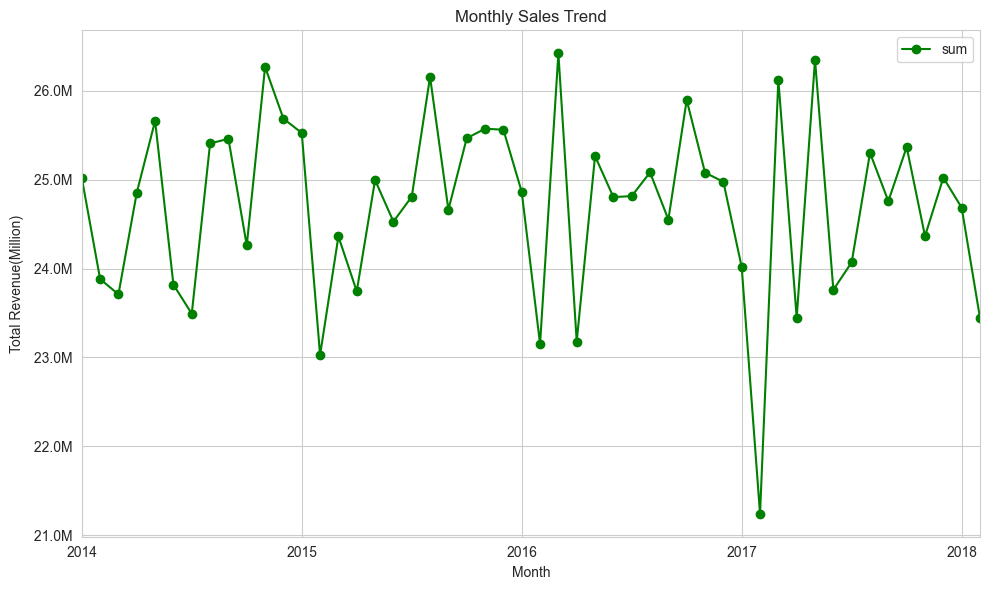

In [70]:
df['order_month'] = df['order_date'].dt.to_period('M')
monthly_sales = df.groupby('order_month')['revenue'].agg(["sum"])
plt.figure(figsize=(15,4))
monthly_sales.plot(kind='line',marker='o',color='green')

from matplotlib.ticker import FuncFormatter
ax = plt.gca()

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{x/1e6 : .1f}M'))
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue(Million)')
plt.tight_layout()

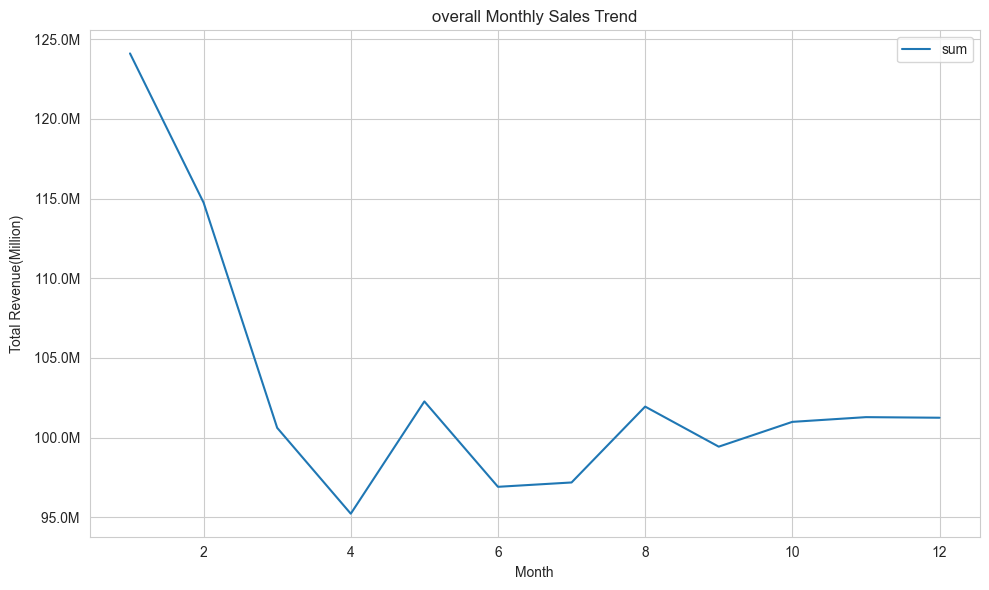

In [71]:
# df['order_month_name'] = df['order_date'].dt.month_name()

df['order_month'] = df['order_date'].dt.month
# df['order_month_name'] = df['order_date'].dt.strftime('%B')
sales_months_overall = df.groupby('order_month')['revenue'].agg(['sum'])

sales_months_overall.plot(kind='line')
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos : f'{x/1e6 : .1f}M'))
plt.title('overall Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue(Million)')
plt.tight_layout()

C:\Users\Ankit\AppData\Local\Temp\ipykernel_16464\3697204476.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


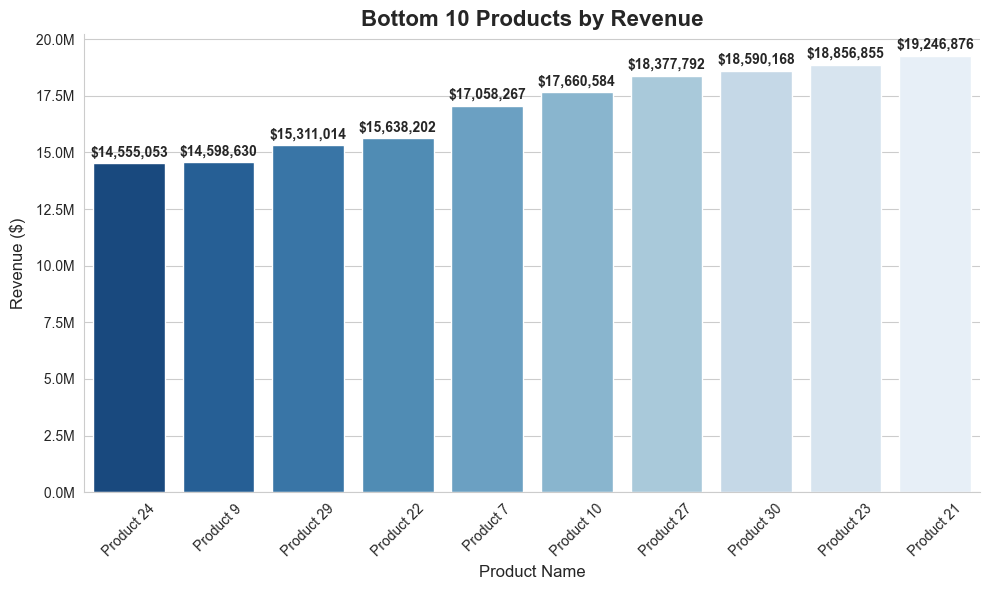

In [72]:
# Filter and aggregate
df_new = df[(df['order_month'] != '2018-01') & (df['order_month'] != '2018-02')].copy()
top_10_products_by_rev = (
    df.groupby('product_name')['revenue']
    .agg(["sum"])
    .sort_values(by="sum", ascending=True)
    .head(10)
    .reset_index()
)

# Currency formatter
def currency(x, pos):
    return  f'{x/1e6 : .1f}M'

# plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_10_products_by_rev,
    x="product_name",
    y="sum",
    palette="Blues_r"
)

# Format y-axis as currency
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))

# Add values on top of bars
for i, row in top_10_products_by_rev.iterrows():
    plt.text(
        i, 
        row["sum"] + (row["sum"] * 0.01),  # slight offset above bar
        f"${row['sum']:,.0f}",
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

# Title & labels
plt.title("Bottom 10 Products by Revenue", fontsize=16, weight='bold')
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)

# Rotate x-labels for readability
plt.xticks(rotation=45)

# Remove spines
sns.despine()

plt.tight_layout()
plt.show()

In [73]:
# df['order_month'] = df['order_date'].dt.to_period('M')
# year_Month  info of the dataset
df[(df['order_month'] != '2018-01')&(df['order_month'] != '2018-02')]['order_month'].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

C:\Users\Ankit\AppData\Local\Temp\ipykernel_16464\1980489932.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


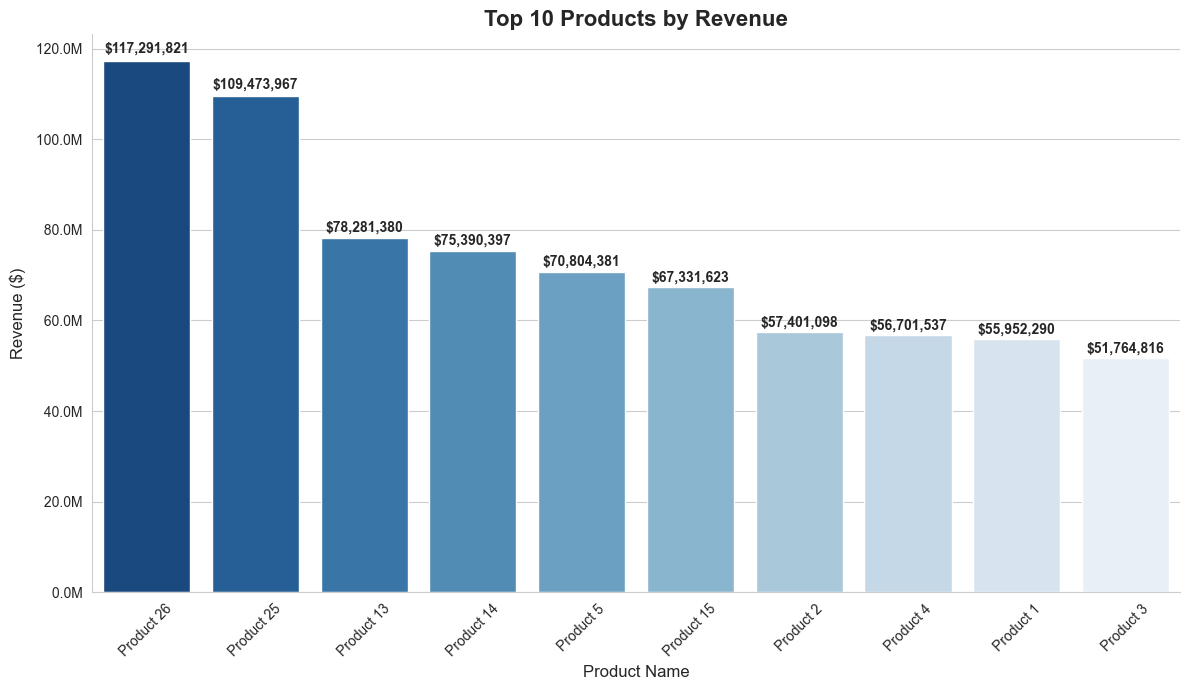

In [74]:
# Filter and aggregate
df_new = df[(df['order_month'] != '2018-01') & (df['order_month'] != '2018-02')].copy()
top_10_products_by_rev = (
    df.groupby('product_name')['revenue']
    .agg(["sum"])
    .sort_values(by="sum", ascending=False)
    .head(10)
    .reset_index()
)

# Currency formatter
def currency(x, pos):
    return  f'{x/1e6 : .1f}M'

plt.figure(figsize=(12, 7))
sns.barplot(
    data=top_10_products_by_rev,
    x="product_name",
    y="sum",
    palette="Blues_r"
)

# Format y-axis as currency
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))

# Add values on top of bars
for i, row in top_10_products_by_rev.iterrows():
    plt.text(
        i, 
        row["sum"] + (row["sum"] * 0.01),  # slight offset above bar
        f"${row['sum']:,.0f}",
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

# Title & labels
plt.title("Top 10 Products by Revenue", fontsize=16, weight='bold')
plt.xlabel("Product Name", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)

# Rotate x-labels for readability
plt.xticks(rotation=45)

# Remove spines
sns.despine()

plt.tight_layout()
plt.show()

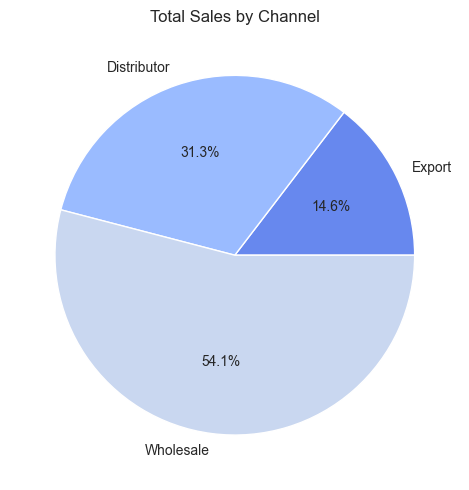

In [75]:
## Sales by Channel

chan_sales = df.groupby('channel')['revenue'].sum().sort_values(ascending=True)

plt.figure(figsize=(5,5))

plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm')
)

plt.title('Total Sales by Channel')
plt.tight_layout()


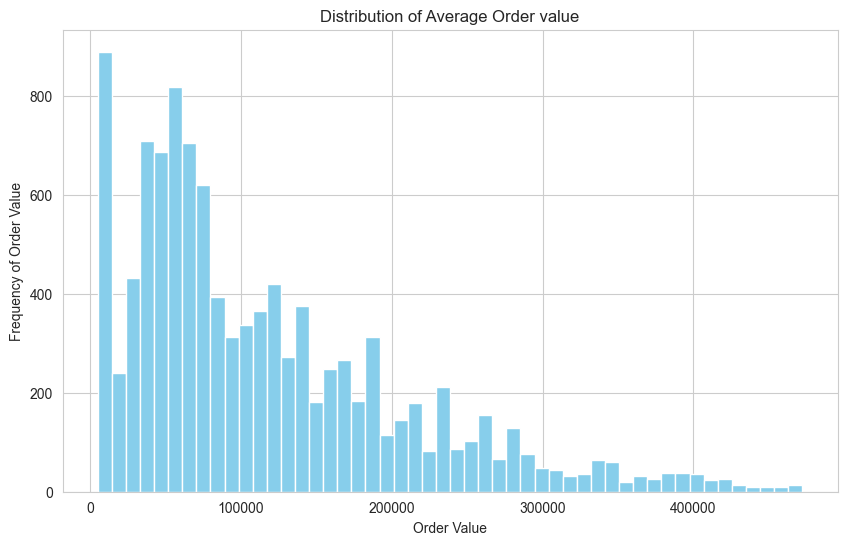

In [76]:
# Average Order Value (AOV) Distribution 
df['order_number']
aov = df.groupby('order_number')['revenue'].sum()
plt.hist(aov,bins=50,color='skyblue')
plt.title('Distribution of Average Order value')
plt.xlabel("Order Value")
plt.ylabel("Frequency of Order Value")
plt.show()

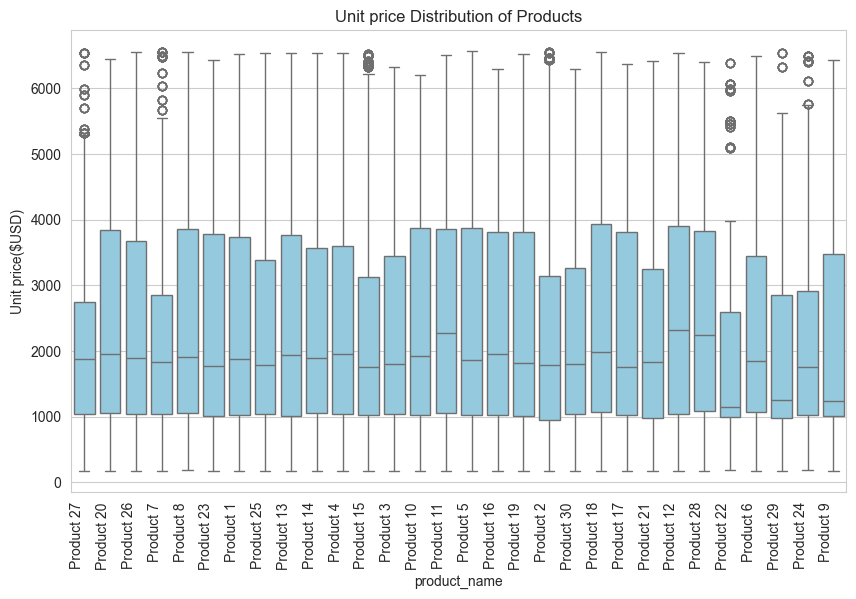

In [77]:
# Unit Price distribution per product (Top 10 )



sns.boxplot(df,x='product_name',y='unit_price',color='skyblue')
plt.title("Unit price Distribution of Products")
plt.ylabel('Unit price($USD)')
plt.xticks(rotation=90,ha='right')
plt.show()


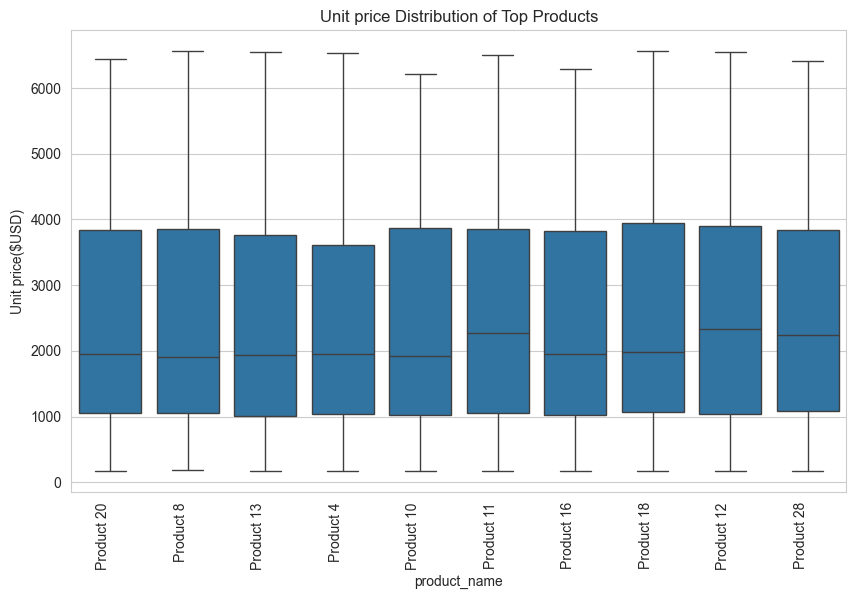

In [78]:
# Top 10 product by unit price median
Top_Product_Up_Median= df.groupby(['product_name'])['unit_price'].agg(['median']).sort_values(by='median',ascending=False).head(10).index.tolist()
df_Top_Product_Up_Median = df[(df['product_name'].isin(Top_Product_Up_Median))].copy()
sns.boxplot(df_Top_Product_Up_Median,x='product_name',y='unit_price')
plt.title("Unit price Distribution of Top Products")
plt.ylabel('Unit price($USD)')
plt.xticks(rotation=90,ha='right')
plt.show()

C:\Users\Ankit\AppData\Local\Temp\ipykernel_16464\1628120040.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Ankit\AppData\Local\Temp\ipykernel_16464\1628120040.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


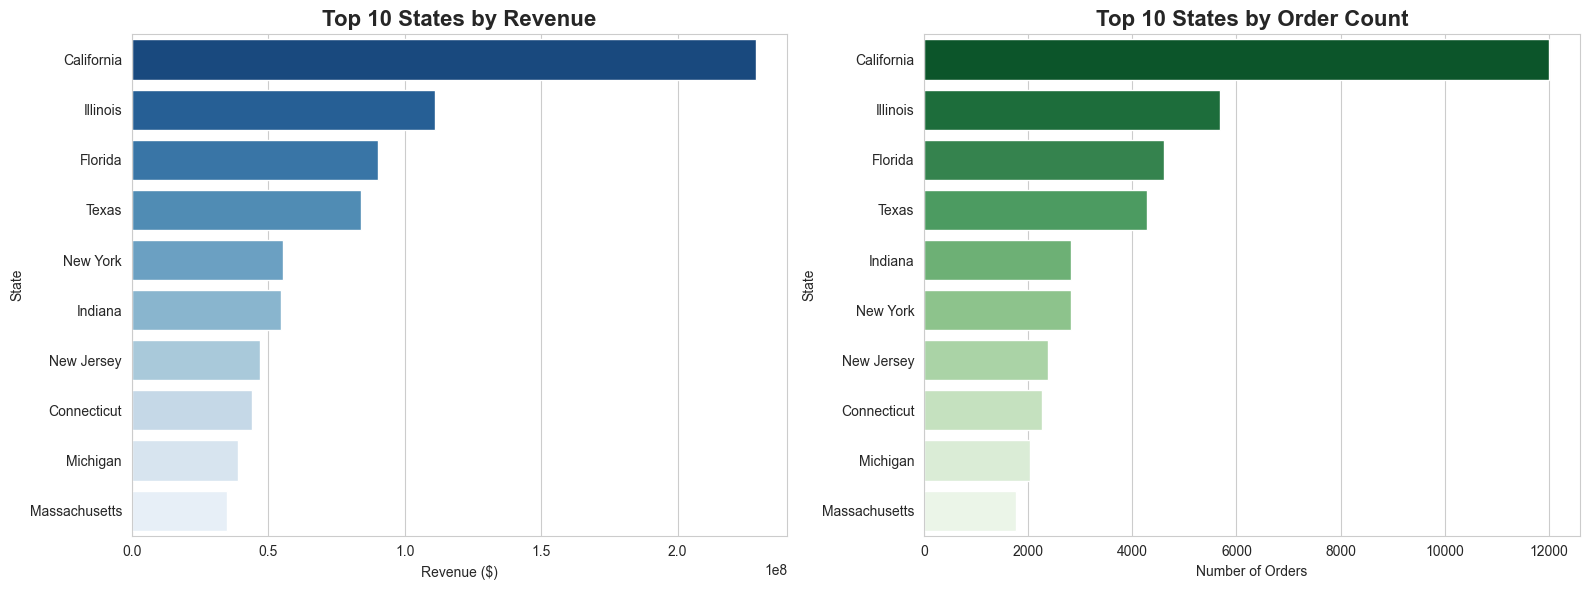

In [79]:
# --- Top 10 States by Revenue ---
top_states_revenue = (
    df.groupby("state_name")["revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# --- Top 10 States by Order Count ---
top_states_orders = (
    df.groupby("state_name")["order_number"]
    .size()
    .sort_values(ascending=False)
    .head(10)
)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Left plot - Revenue
sns.barplot(
    x=top_states_revenue.values,
    y=top_states_revenue.index,
    palette="Blues_r",
    ax=ax[0]
)
ax[0].set_title("Top 10 States by Revenue", fontsize=16, weight="bold")
ax[0].set_xlabel("Revenue ($)")
ax[0].set_ylabel("State")

# Right plot - Order Count
sns.barplot(
    x=top_states_orders.values,
    y=top_states_orders.index,
    palette="Greens_r",
    ax=ax[1]
)
ax[1].set_title("Top 10 States by Order Count", fontsize=16, weight="bold")
ax[1].set_xlabel("Number of Orders")
ax[1].set_ylabel("State")

plt.tight_layout()
plt.show()


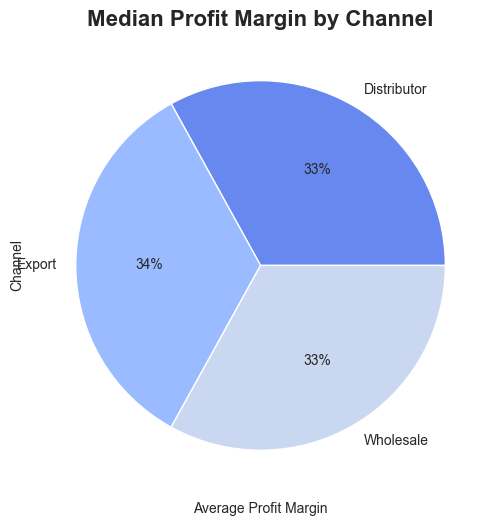

In [80]:
df[['profit','profit_margin_pct']]
Channel_Profit_margin_pct = df.groupby('channel')['profit_margin_pct'].median()
plt.pie(
    Channel_Profit_margin_pct.values,
    labels=Channel_Profit_margin_pct.index,
    autopct='%1.0f%%',
    colors=sns.color_palette('coolwarm')
)
plt.title("Median Profit Margin by Channel", fontsize=16, weight="bold")
plt.xlabel("Average Profit Margin")
plt.ylabel("Channel")
plt.show()

C:\Users\Ankit\AppData\Local\Temp\ipykernel_16464\2115432581.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Ankit\AppData\Local\Temp\ipykernel_16464\2115432581.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


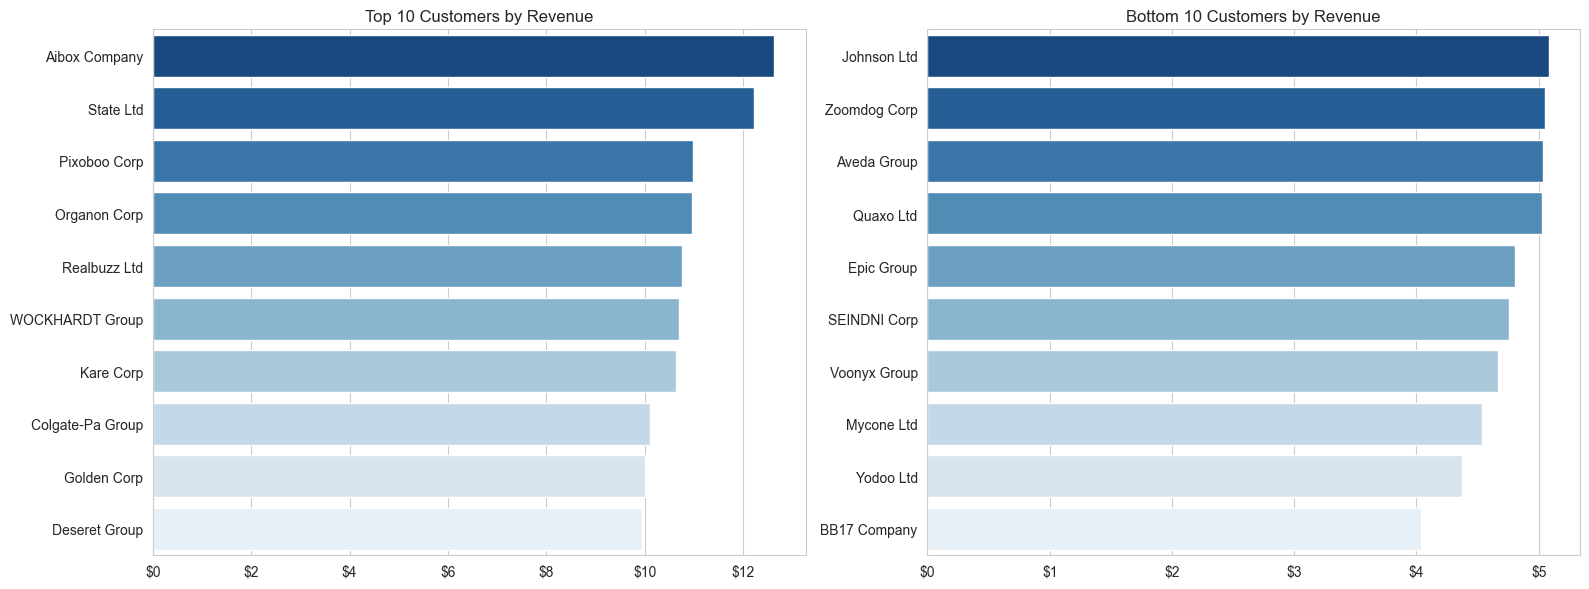

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Top and bottom Customers by revenue
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
formatter = FuncFormatter(lambda x, _: f"${x/1e6:,.0f}")

# Aggregate top and bottom
Top_customer = (
    df.groupby('customer_names')['revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

bottom_customer = (
    df.groupby('customer_names')['revenue']
    .sum()
    .sort_values(ascending=False)
    .tail(10)
    .reset_index()
)

# Top customers - horizontal bar
sns.barplot(
    data=Top_customer,
    x='revenue',
    y='customer_names',
    palette="Blues_r",
    ax=ax[0]
)
ax[0].xaxis.set_major_formatter(formatter)
ax[0].set_title("Top 10 Customers by Revenue")

ax[0].set_ylabel("")
ax[0].set_xlabel("")

# Bottom customers - horizontal bar
sns.barplot(
    data=bottom_customer,
    x='revenue',
    y='customer_names',
    palette="Blues_r",
    ax=ax[1]
)
ax[1].xaxis.set_major_formatter(formatter)
ax[1].set_title("Bottom 10 Customers by Revenue")
ax[1].set_ylabel("")
ax[1].set_xlabel("")

plt.tight_layout()
plt.show()


In [82]:
# First calculate thresholds dynamically
revenue_threshold = 0.6*1e7   # or df['revenue'].quantile(0.75)
profit_threshold = customer_summary["profit_margin"].median()  # or df['profit_margin'].quantile(0.75)

print("Revenue Threshold:", revenue_threshold)
print("Profit Margin Threshold:", profit_threshold)

def segment(row):
    if row['revenue'] > revenue_threshold and row['profit_margin'] > profit_threshold:
        return "High Value"
    elif row['revenue'] > revenue_threshold and row['profit_margin'] <= profit_threshold:
        return "Revenue-Only"
    elif row['revenue'] <= revenue_threshold and row['profit_margin'] > profit_threshold:
        return "Profit-Only"
    else:
        return "Low Value"

customer_summary['segment'] = customer_summary.apply(segment, axis=1)

import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=customer_summary,
    x="revenue",
    y="profit_margin",
    hue="segment",
    palette="Set1",
    s=100,
    alpha=0.7
)
formatter = FuncFormatter(lambda x, _: f"${x/1e6:,.0f}M")
plt.gca().xaxis.set_major_formatter(formatter)

plt.xlabel("Revenue ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Customer Segmentation: Revenue vs Profit Margin")
plt.legend(title="Segment")
plt.show()

NameError: name 'customer_summary' is not defined

In [ ]:
print(0.4*1e7)

4000000.0


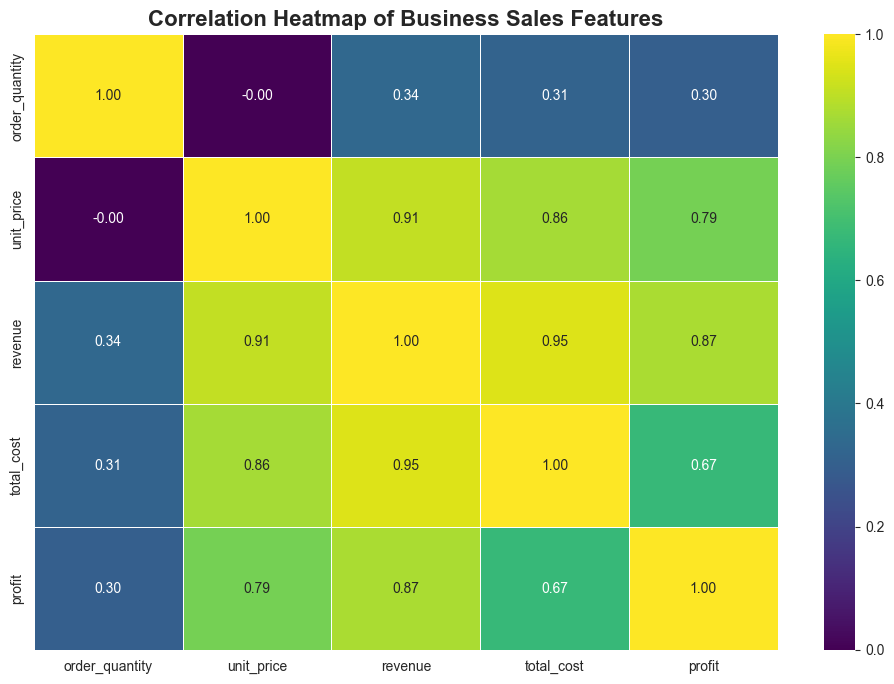

In [ ]:

numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = df[['order_quantity','unit_price','revenue','total_cost','profit']].corr()

plt.figure(figsize=(12,8))
sns.heatmap(
    corr,
    annot=True,        # show correlation values
    fmt=".2f",         # format to 2 decimals
    cmap="viridis",   # color scale
    # center=0,          # 0 correlation in middle
    linewidths=0.5
)

plt.title("Correlation Heatmap of Business Sales Features", fontsize=16, weight="bold")
plt.show()

In [86]:
df['month_name'] = df['order_date'].dt.strftime("%B")

In [92]:
df['order_year']= df['order_date'].dt.strftime('%Y')

In [93]:
df.to_csv('EDA_MASTER_DATA.csv')